#Machine Learning Exam2

# Importing necessary libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")

#Reading and displaying the dataset

In [12]:
df=pd.read_csv('/content/credit_card.csv',sep=',')

In [13]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

getting the shape of the dataset

In [14]:
df.shape

(8950, 18)

Getting details about each and every column

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [51]:
#describing the column
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [52]:
#describing the dataset
df.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  7434.000000        7434.000000  7434.000000       7434.000000   
mean   1269.831784           0.889646   753.123265        431.275673   
std    1517.952340           0.213397  1025.441760        793.561465   
min       0.001214           0.181818     0.000000          0.000000   
25%     120.946159           0.909091    46.687500          0.000000   
50%     790.090769           1.000000   360.955000         35.000000   
75%    1750.662783           1.000000  1023.372500        520.000000   
max    7803.071972           1.000000  7323.380000       5497.040000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             7434.000000   7434.000000          7434.000000   
mean               322.112279    671.957249             0.485746   
std                506.012658   1235.334487             0.396350   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 88.915000      0.000000             0.500000   
75%                443.250000    889.266455             0.916667   
max               3119.280000   7232.069823             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 7434.000000                       7434.000000   
mean                     0.192344                          0.357495   
std                      0.287619                          0.392628   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.250000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             7434.000000       7434.000000    7434.000000   7434.000000   
mean                 0.109677          2.314501      12.057842   3999.597543   
std                  0.158778          3.941055      15.120242   2935.900739   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1500.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.166667          3.000000      16.000000   6000.000000   
max                  0.727273         23.000000      89.000000  15000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   7434.000000       7434.000000       7434.000000  7434.000000  
mean    1297.565656        588.086810          0.154570    11.750740  
std     1436.498465        776.405963          0.290825     0.798485  
min        0.000000          0.019163          0.000000     8.000000  
25%      390.216308        167.947384          0.000000    12.000000  
50%      797.938345        291.135341          0.000000    12.000000  
75%     1626.296448        736.779962          0.166667    12.000000  
max    10226.601760       7781.671432          1.000000    12.000000

In [53]:
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8876  C19117   121.294493           0.750000     385.26            385.26   
8877  C19118    55.147722           0.875000     163.31              0.00   
8878  C19119   869.328293           0.750000       0.00              0.00   
8879  C19120   137.744895           1.000000     441.00              0.00   
8880  C19121   331.070135           0.750000      81.20             81.20   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8876                    0.00    169.554775             0.500000   
8877                  163.31      0.000000             0.875000   
8878                    0.00   1153.925205             0.000000   
8879                  441.00      0.000000             0.750000   
8880                    0.00    419.341394             0.125000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8876                    0.500000                          0.000000   
8877                    0.000000                          0.750000   
8878                    0.000000                          0.000000   
8879                    0.000000                          0.625000   
8880                    0.125000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8876                0.125000                 3              7         500.0   
8877                0.000000                 0              7        1000.0   
8878                0.125000                 3              0        1200.0   
8879                0.000000                 0              6        1000.0   
8880                0.250000                 7              1         500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.000000          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8876    98.225317        113.944625  

#Q1)  Primary analysis of several categorical features

In [16]:
cat_col=df.select_dtypes(include=['object']).columns.tolist()
cat_col

['CUST_ID']

In [17]:
df.CUST_ID.nunique()

8950

In [18]:
df.head(2)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182       95.4               0.0   
1  C10002  3202.467416           0.909091        0.0               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12

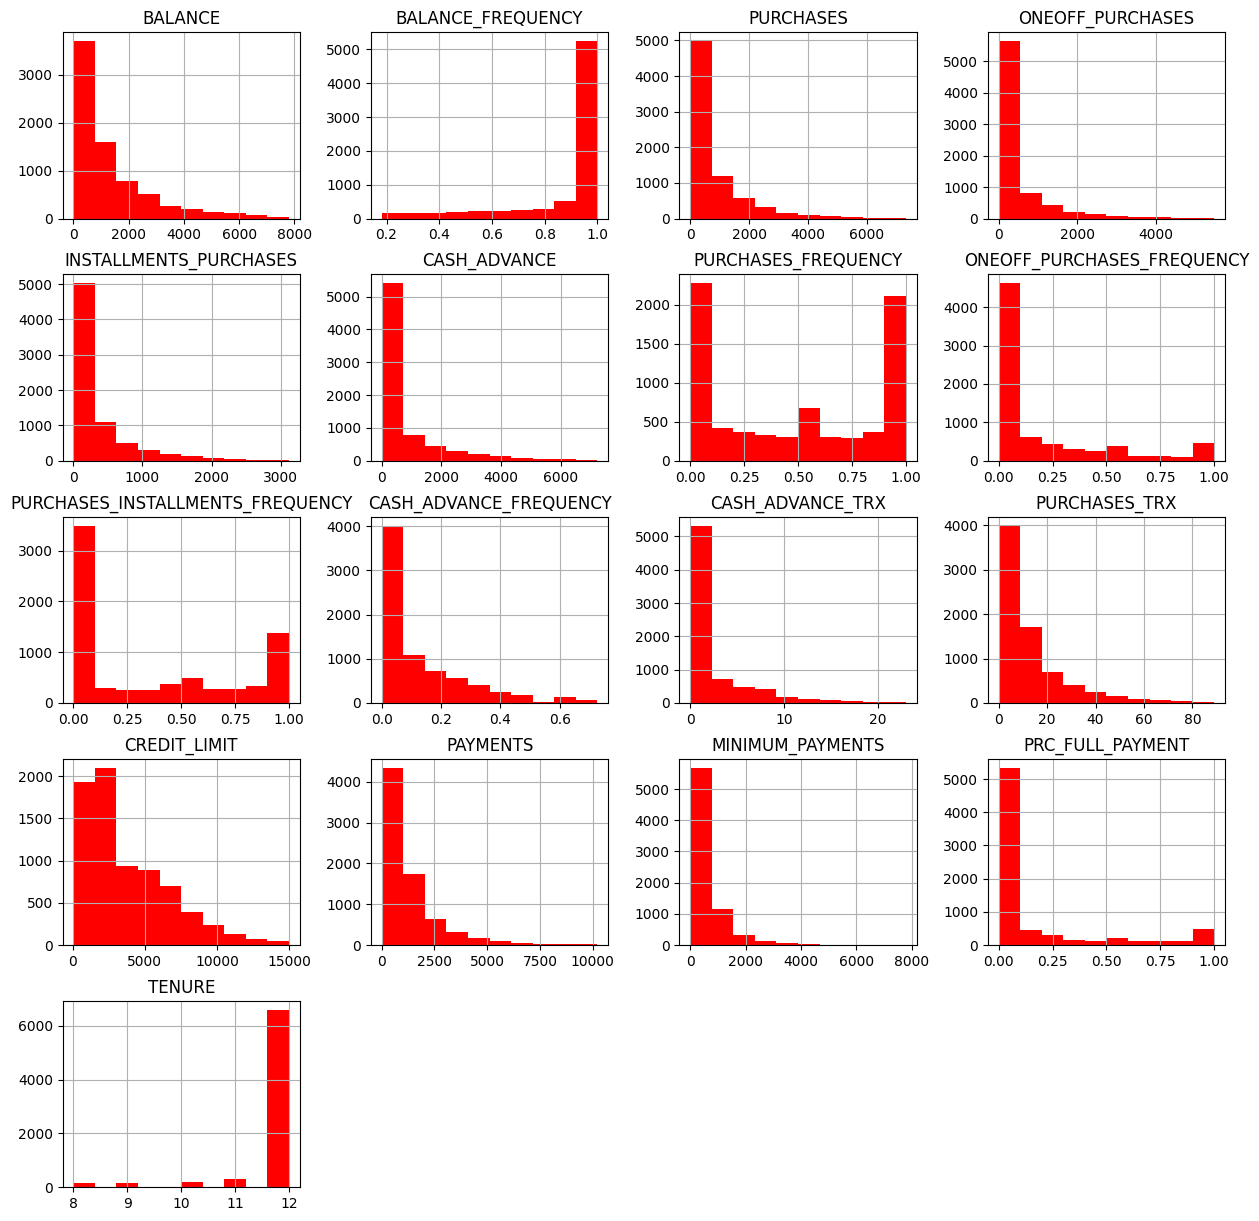

In [54]:
# histogram
import matplotlib.pyplot as plt
fig=df.hist(figsize=(15,15),color='red')
plt.show()


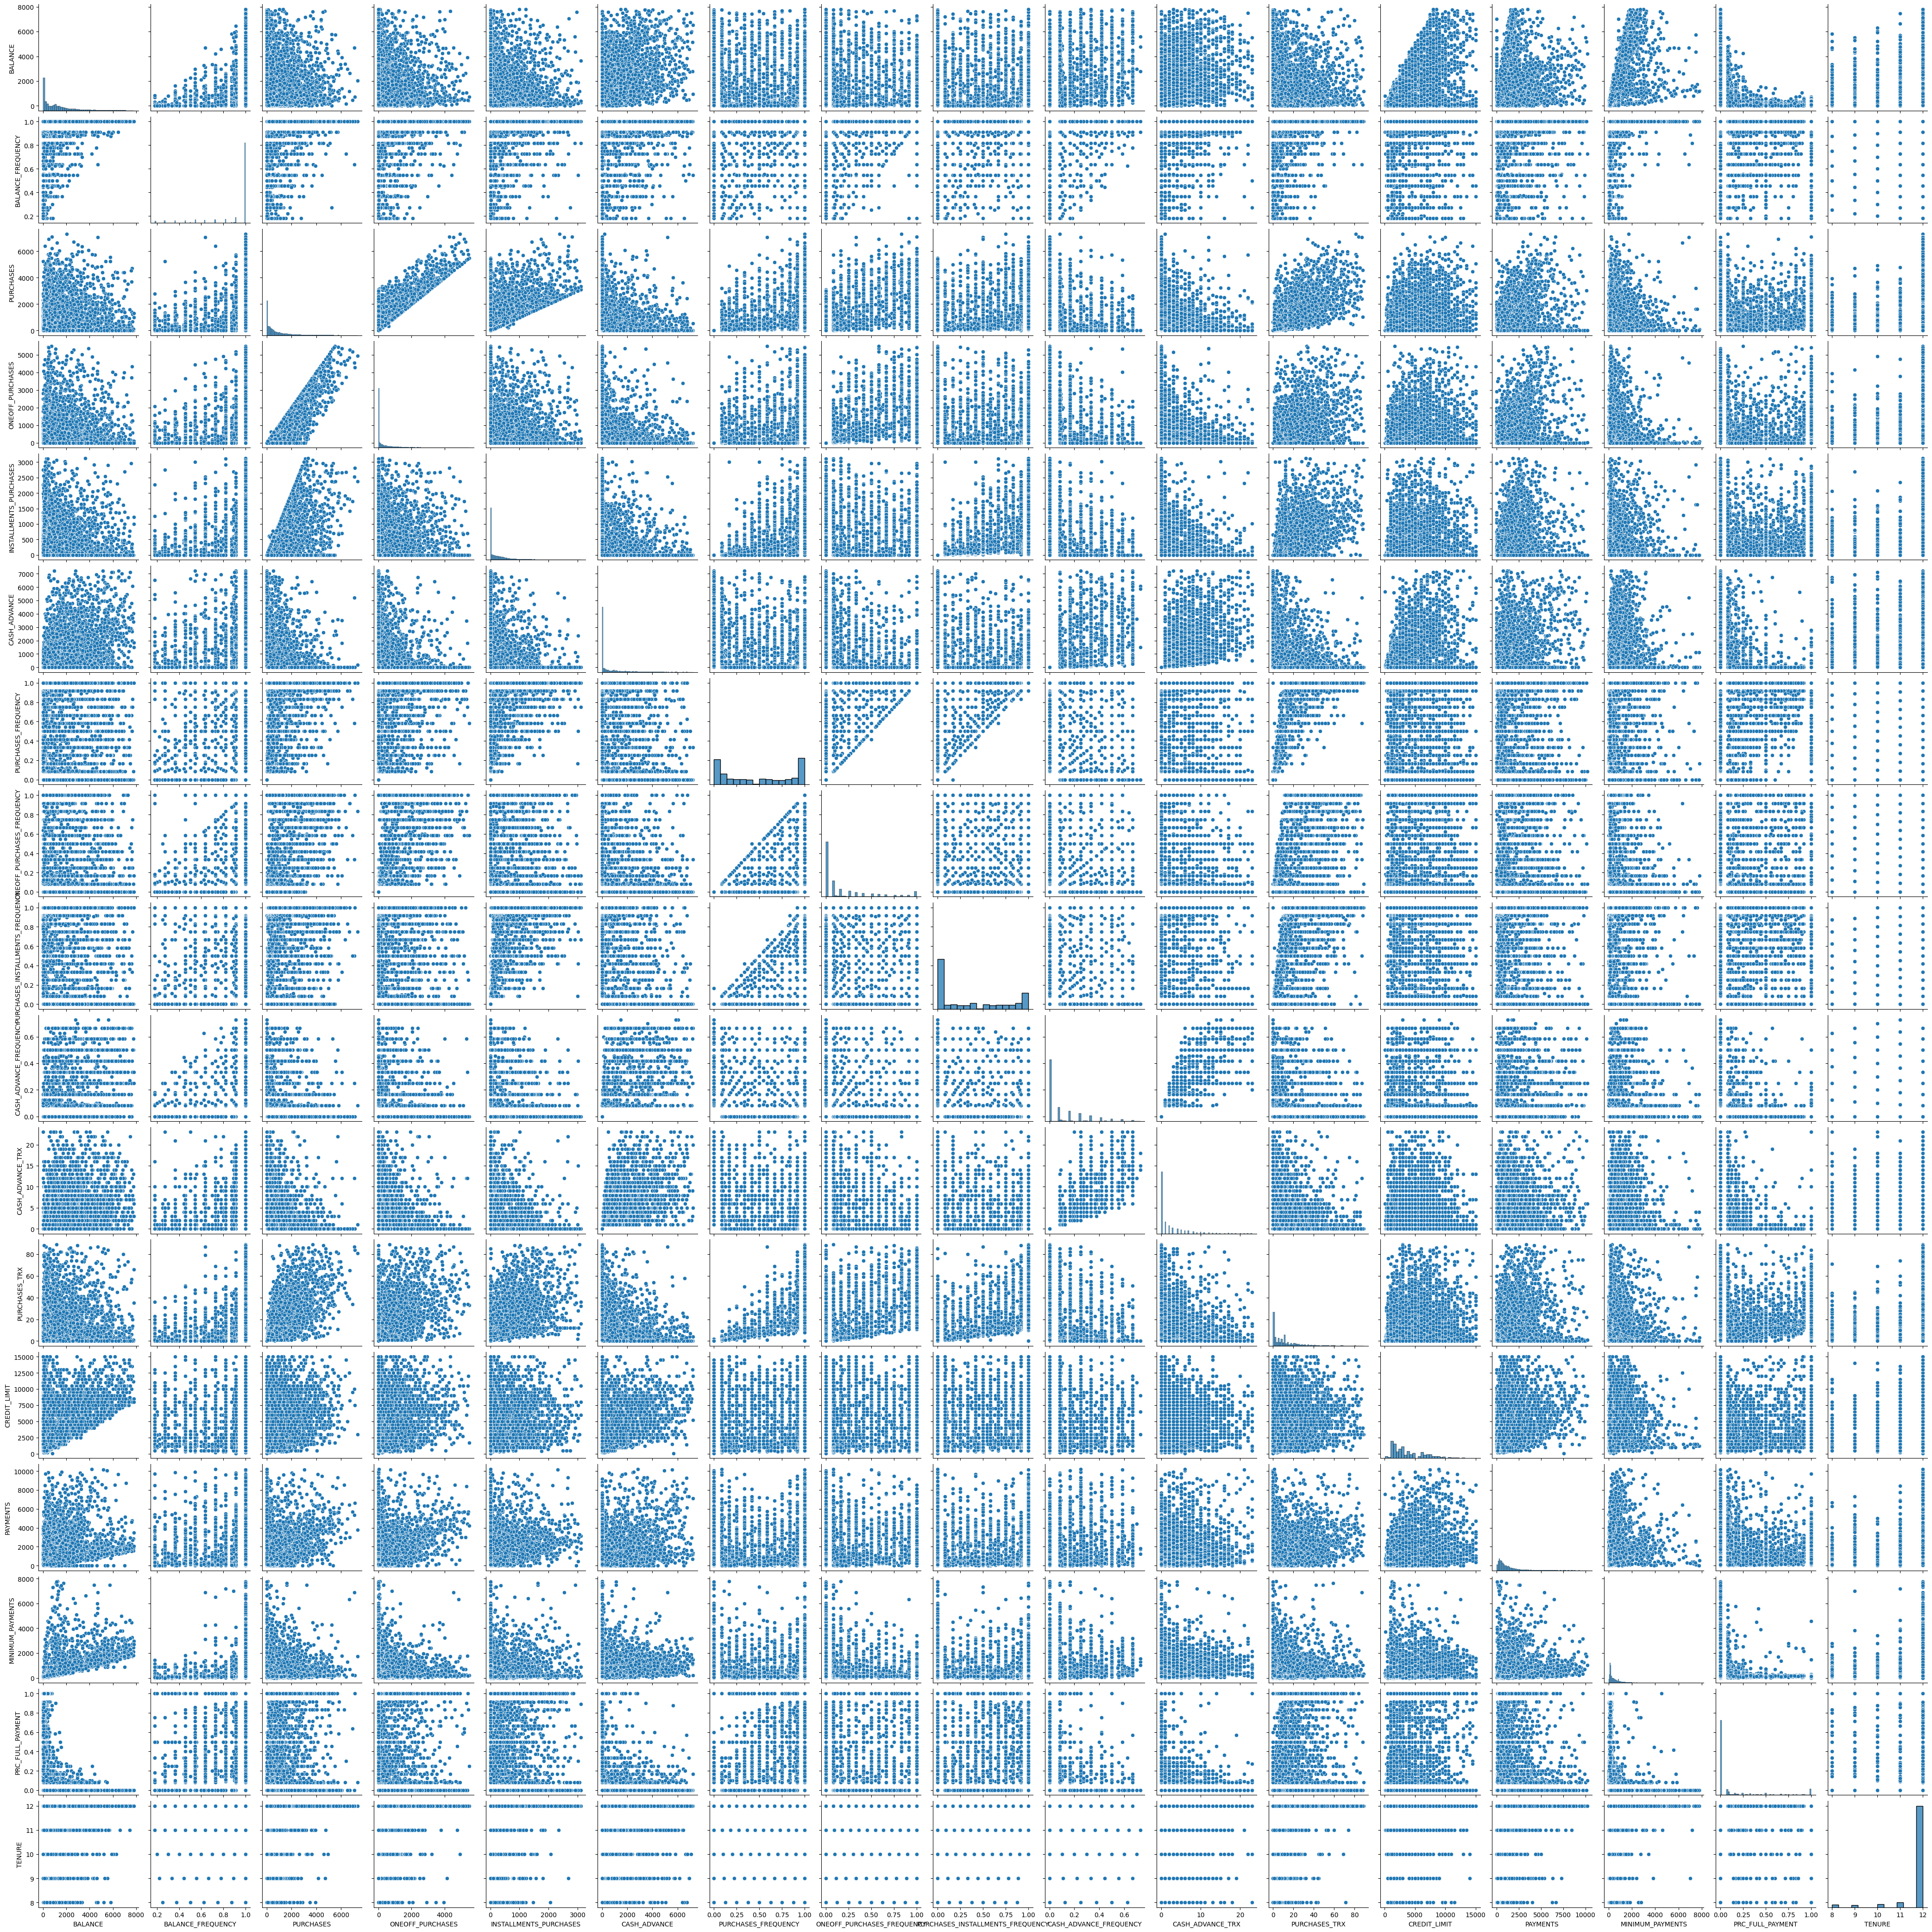

In [55]:
#pairing the plot
sns.pairplot(df)


#Exploratory data analysis tasks

<Axes: >

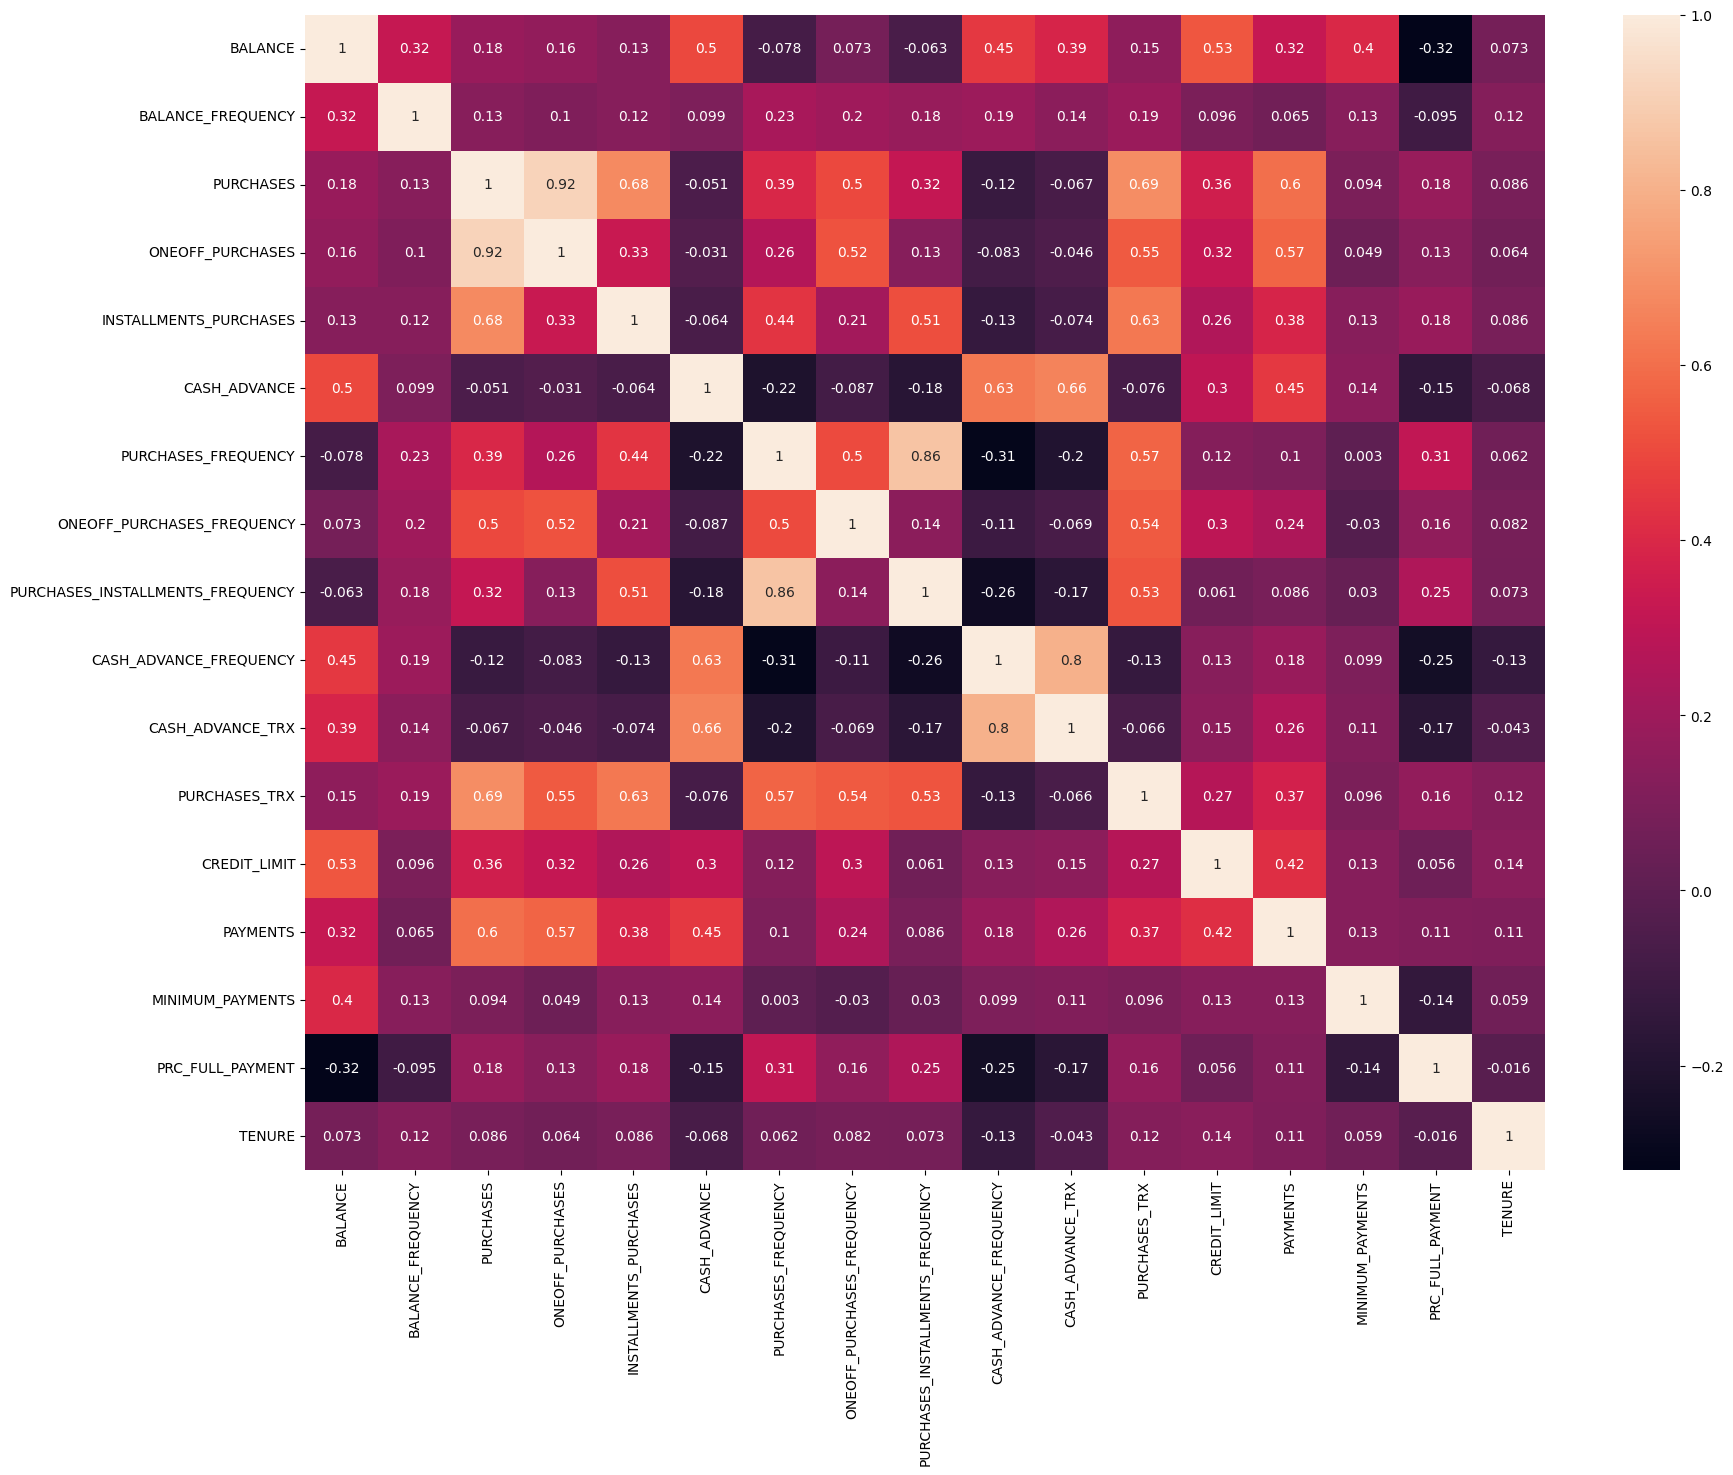

In [30]:
#Checking correlation between variables
data_corr = df.select_dtypes(include=['int','float'])
plt.figure(figsize=(20 , 15))
sns.heatmap(data_corr.corr(),annot = True)

#Q2) Perform the following Explaratory data analysis tasks

1) Missing value analysis

2)Outlier treatment using z-score analysis

3)Dealing with correlated variables


#Missing value analysis

In [31]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

filling missing values

In [56]:
df.MINIMUM_PAYMENTS.fillna(0,inplace=True)
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mode()[0],inplace=True)

checking for missing values

In [57]:
df.isna().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [58]:
#dropping cust_id
df=df.drop(['CUST_ID'],axis=1)

In [59]:

df.shape

(7434, 17)

In [60]:
#removing duplicates
df=df.drop_duplicates()

In [61]:
df.shape

(7434, 17)

#b) Outlier treatment using the z-score method

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7434 entries, 0 to 8880
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           7434 non-null   float64
 1   BALANCE_FREQUENCY                 7434 non-null   float64
 2   PURCHASES                         7434 non-null   float64
 3   ONEOFF_PURCHASES                  7434 non-null   float64
 4   INSTALLMENTS_PURCHASES            7434 non-null   float64
 5   CASH_ADVANCE                      7434 non-null   float64
 6   PURCHASES_FREQUENCY               7434 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        7434 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  7434 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            7434 non-null   float64
 10  CASH_ADVANCE_TRX                  7434 non-null   int64  
 11  PURCHASES_TRX                     7434 non-null   int64  
 12  CREDIT_LIMI

In [63]:
# getting columns

import numpy
col=df.columns.values

In [64]:
# IQR method (Inter Quantile Range Method)

p0=[]
p100=[]
iqr=[]

q1=[]
q2=[]
q3=[]


for i in col:

  if type(df[i][0]) in [numpy.float64,numpy.int64] :

    p0.append(df[i].min())

    p100.append(df[i].max())

    x=df[i].quantile(0.25)                   # 25th quantile

    y= df[i].quantile(0.50)                    # 50th quantile

    z= df[i].quantile(0.75)                    # 75th quantile

    q1.append(x)
    q2.append(y)
    q3.append(z)

    iqr.append(z-x)                            # Inter Quantile Range
  else:
    p0.append(None)

    p100.append(None)

    iqr.append(None)

    q1.append(None)
    q2.append(None)
    q3.append(None)

In [65]:
n=len(col)-1
for i in range(0,n):
  print(p0[i],'\t',p100[i],'\t',iqr[i])

0.001214 	 7803.071972 	 1629.7166235
0.181818 	 1.0 	 0.09090900000000002
0.0 	 7323.38 	 976.685
0.0 	 5497.04 	 520.0
0.0 	 3119.28 	 443.25
0.0 	 7232.069823 	 889.2664550000001
0.0 	 1.0 	 0.833334
0.0 	 1.0 	 0.25
0.0 	 1.0 	 0.75
0.0 	 0.727273 	 0.166667
0 	 23 	 3.0
0 	 89 	 15.0
50.0 	 15000.0 	 4500.0
0.0 	 10226.60176 	 1236.08014025
0.019163 	 7781.671432 	 568.832578
0.0 	 1.0 	 0.166667


In [66]:
lower_cutoff=[]
upper_cutoff=[]
i=0
for i in range(0,n):
  if (iqr[i]!=None) and (q1[i]!=None) and (q3[i]!=None):
    lower_cutoff.append(q1[i]- 1.5*iqr[i])
    upper_cutoff.append(q3[i]+ 1.5*iqr[i])
  else:
    lower_cutoff.append(None)
    upper_cutoff.append(None)

In [67]:
lower_cutoff

[-2323.6287759999996,
 0.7727275,
 -1418.34,
 -780.0,
 -664.875,
 -1333.8996825000002,
 -1.166668,
 -0.375,
 -1.125,
 -0.2500005,
 -4.5,
 -21.5,
 -5250.0,
 -1463.9039026250002,
 -685.30148275,
 -0.2500005]

In [68]:
upper_cutoff

[4195.237717999999,
 1.1363635,
 2488.3999999999996,
 1300.0,
 1108.125,
 2223.1661375000003,
 2.166668,
 0.625,
 1.875,
 0.4166675,
 7.5,
 38.5,
 12750.0,
 3480.416658375,
 1590.02882925,
 0.4166675]

In [69]:
# clipping the outliers

# if the lower_cutoff < p0 -> There are no outliers on the lower side
# if the upper_cutoff > p100 -> There are no outliers on the higher side
i=0
for i in range(0,n):
    df[col[i]].clip(upper=upper_cutoff[i],inplace=True)
    df[col[i]].clip(lower=lower_cutoff[i],inplace=True)


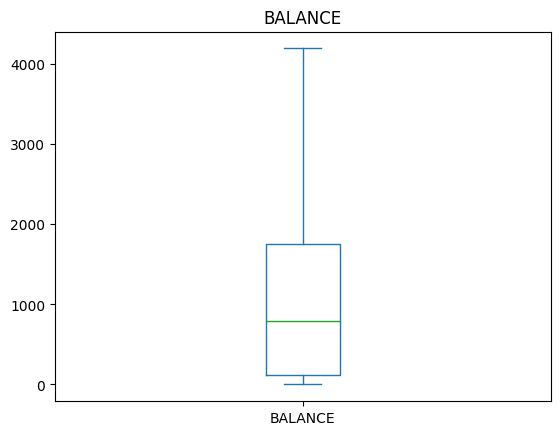

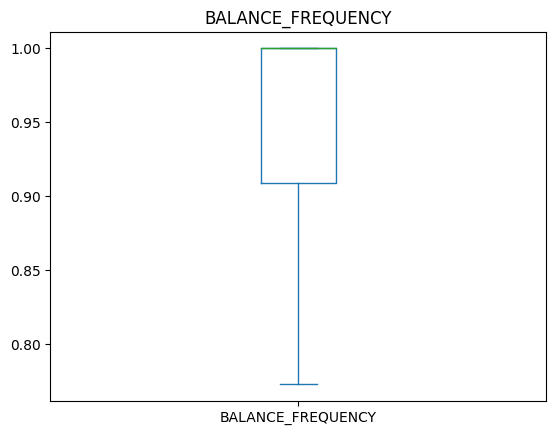

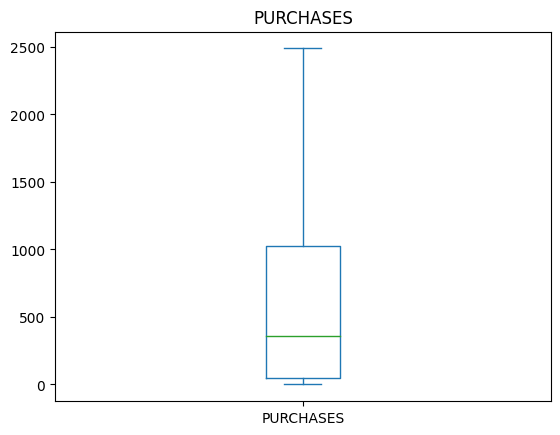

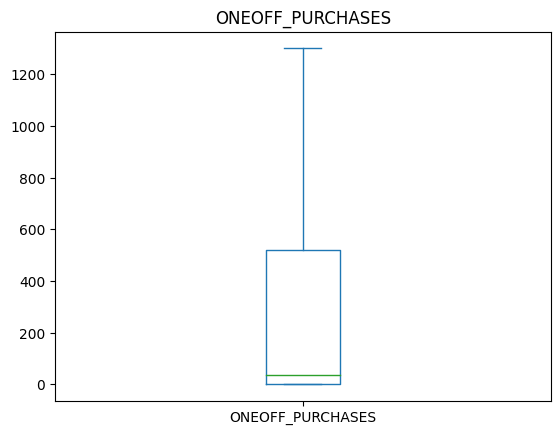

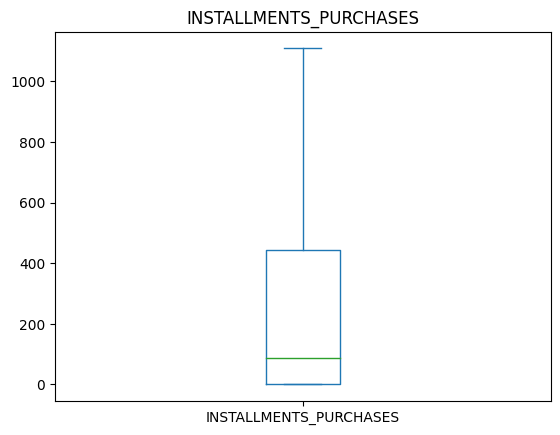

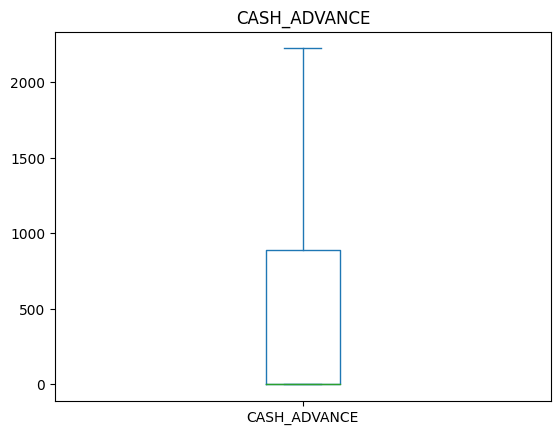

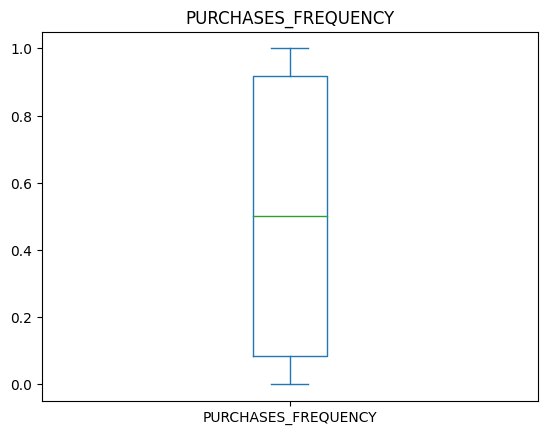

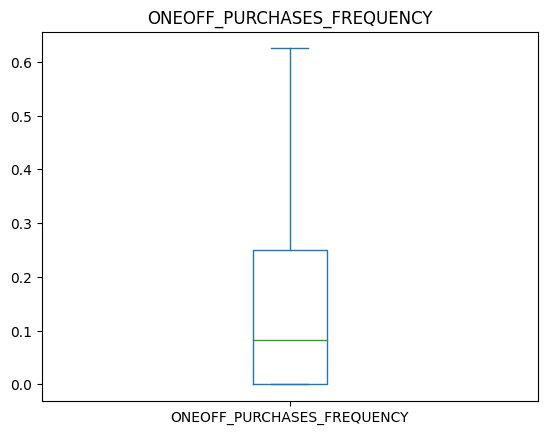

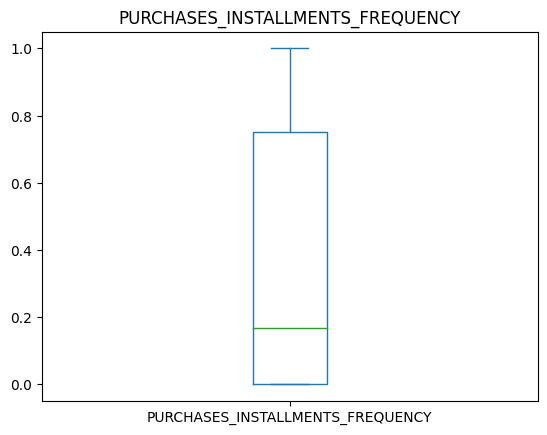

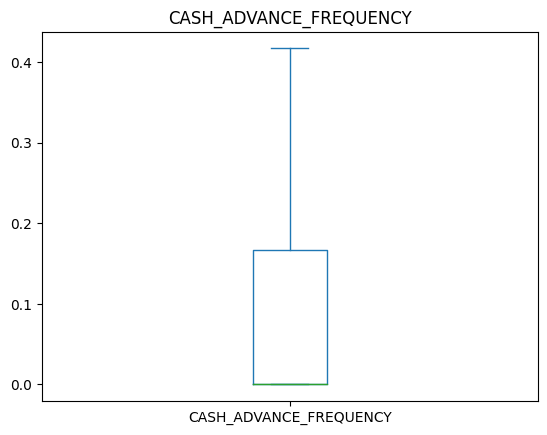

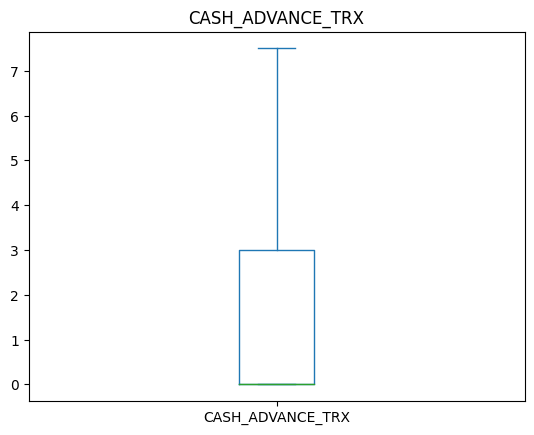

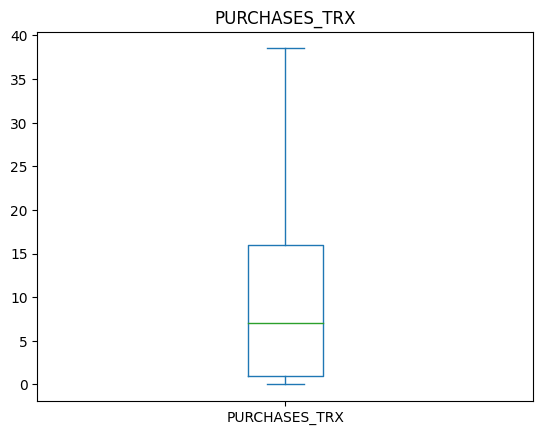

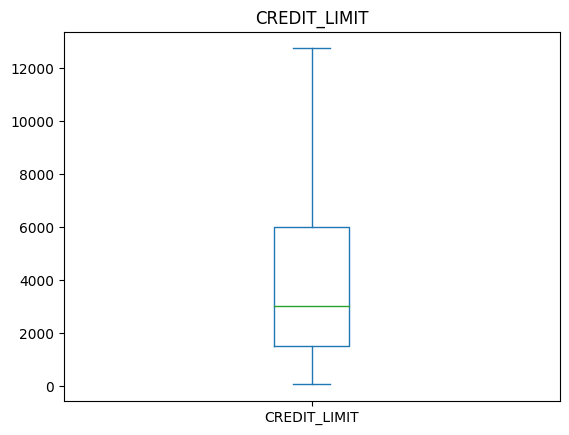

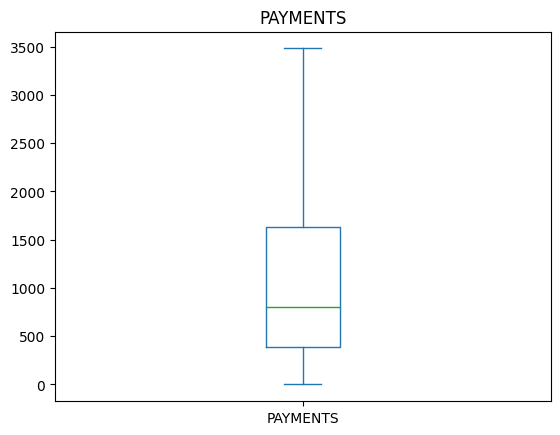

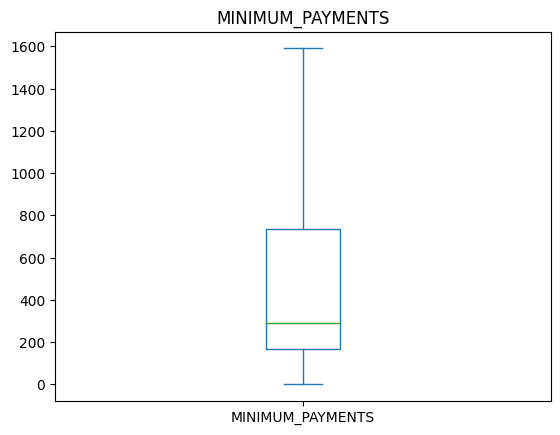

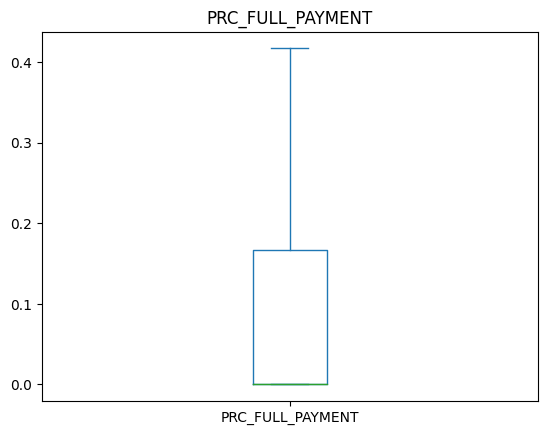

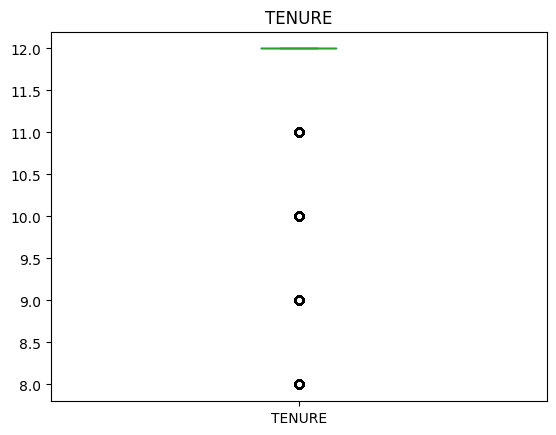

In [70]:
# boxplot after cliping
for i in col:
  df[i].plot(title=i,kind='box')
  plt.show()


#c) Dealing with correlated values

In [71]:
df.corr()

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.408098   0.019976   
BALANCE_FREQUENCY                 0.408098           1.000000   0.139184   
PURCHASES                         0.019976           0.139184   1.000000   
ONEOFF_PURCHASES                  0.078852           0.110749   0.812413   
INSTALLMENTS_PURCHASES           -0.069790           0.118364   0.672903   
CASH_ADVANCE                      0.519377           0.086109  -0.203335   
PURCHASES_FREQUENCY              -0.157756           0.197580   0.623955   
ONEOFF_PURCHASES_FREQUENCY        0.049055           0.164080   0.661249   
PURCHASES_INSTALLMENTS_FREQUENCY -0.152502           0.157716   0.460928   
CASH_ADVANCE_FREQUENCY            0.489220           0.182899  -0.240150   
CASH_ADVANCE_TRX                  0.479846           0.162536  -0.228264   
PURCHASES_TRX                    -0.020266           0.215281   0.781665   
CREDIT_LIMIT                      0.372888           0.069726   0.291021   
PAYMENTS                          0.255574           0.072678   0.475645   
MINIMUM_PAYMENTS                  0.805762           0.344279   0.017137   
PRC_FULL_PAYMENT                 -0.464800          -0.232221   0.210279   
TENURE                            0.054992           0.171000   0.074614   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.078852               -0.069790   
BALANCE_FREQUENCY                         0.110749                0.118364   
PURCHASES                                 0.812413                0.672903   
ONEOFF_PURCHASES                          1.000000                0.204339   
INSTALLMENTS_PURCHASES                    0.204339                1.000000   
CASH_ADVANCE                             -0.133933               -0.207511   
PURCHASES_FREQUENCY                       0.373896                0.682081   
ONEOFF_PURCHASES_FREQUENCY                0.821541                0.170629   
PURCHASES_INSTALLMENTS_FREQUENCY          0.088336                0.778473   
CASH_ADVANCE_FREQUENCY                   -0.147635               -0.250048   
CASH_ADVANCE_TRX                         -0.141844               -0.234613   
PURCHASES_TRX                             0.571139                0.697829   
CREDIT_LIMIT                              0.291498                0.145215   
PAYMENTS                                  0.394505                0.286400   
MINIMUM_PAYMENTS                          0.019820               -0.005056   
PRC_FULL_PAYMENT                          0.065671                0.267433   
TENURE                                    0.046916                0.076705   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.519377            -0.157756   
BALANCE_FREQUENCY                     0.086109             0.197580   
PURCHASES                            -0.203335             0.623955   
ONEOFF_PURCHASES                     -0.133933             0.373896   
INSTALLMENTS_PURCHASES               -0.207511             0.682081   
CASH_ADVANCE                          1.000000            -0.340027   
PURCHASES_FREQUENCY                  -0.340027             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.148670             0.468183   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.279193             0.855422   
CASH_ADVANCE_FREQUENCY                0.760050            -0.374902   
CASH_ADVANCE_TRX                      0.791816            -0.353695   
PURCHASES_TRX                        -0.232251             0.809776   
CREDIT_LIMIT                          0.172637             0.117974   
PAYMENTS                              0.290928             0.150709   
MINIMUM_PAYMENTS                      0.395185            -0.080255   
PRC_FULL_PAYMENT                     -0.247713             0.326073   
TENURE                               -0.083248        

<Axes: >

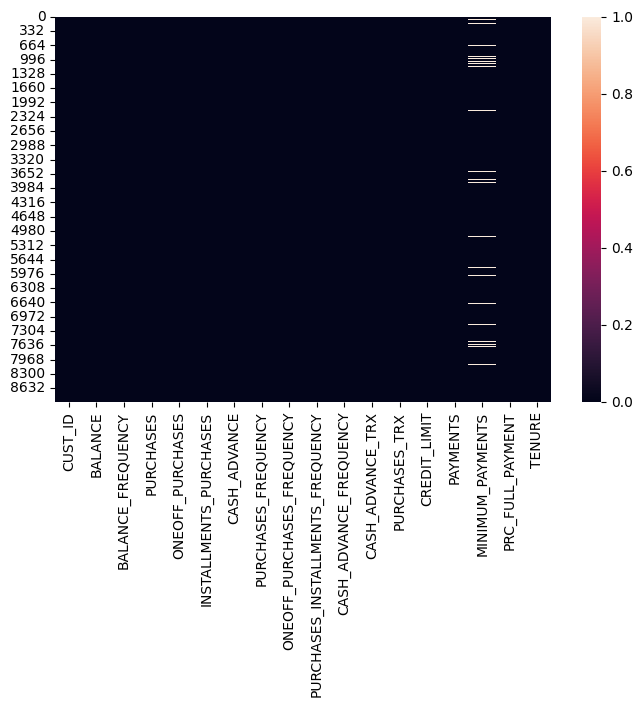

In [32]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())

<Axes: >

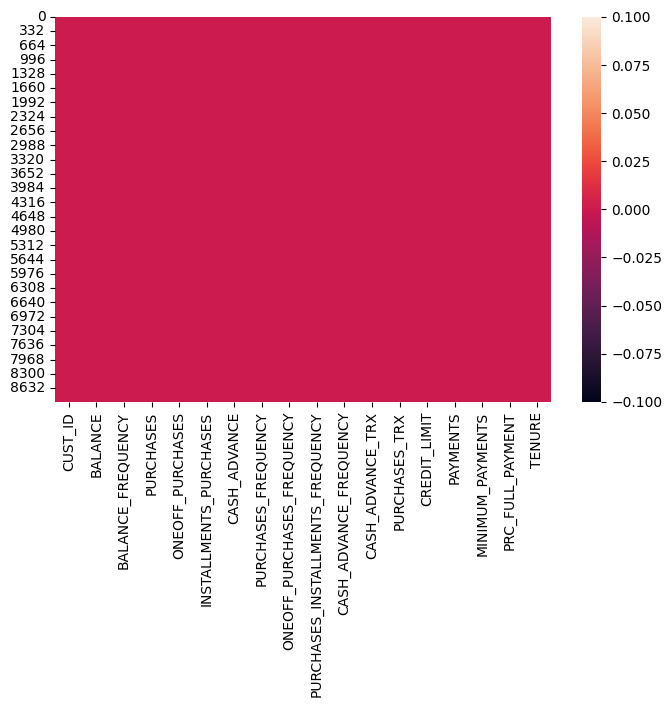

In [35]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())

#Q3) Perform dimensionality reduction using pca such that the 95% of the variance is explained

In [72]:
# PCA - Principal Compound Analysis
x=df.drop(['TENURE'],axis=1)         #dropping of tenure
y=df['TENURE']
print(x)
print(y)


          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.772728    1499.00           1300.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8876   121.294493           0.772728     385.26            385.26   
8877    55.147722           0.875000     163.31              0.00   
8878   869.328293           0.772728       0.00              0.00   
8879   137.744895           1.000000     441.00              0.00   
8880   331.070135           0.772728      81.20             81.20   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   2223.1

In [73]:
#performing train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.60,test_size=0.40,random_state=47)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape


((4460, 16), (2974, 16), (4460,), (2974,))

#Q3)PCA

In [75]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)

In [76]:
pca.fit(xtrain)

PCA(n_components=0.95)

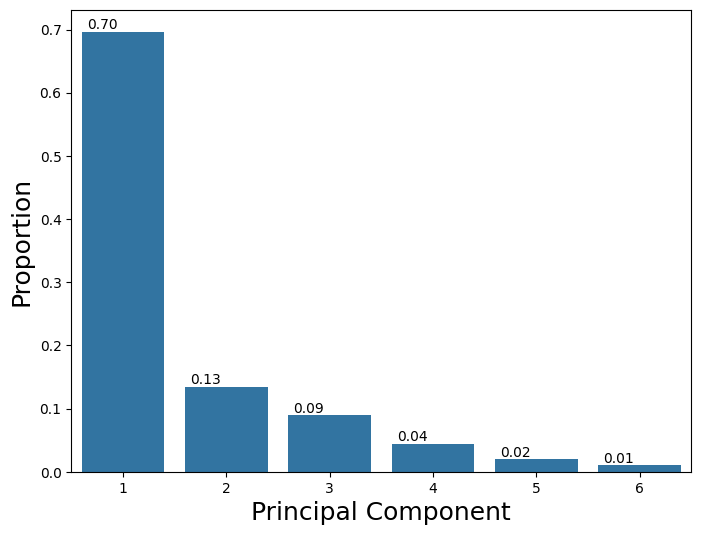

In [80]:
sk_pca = PCA(n_components=6)
sk_pca.fit(df)
dset2 = pd.DataFrame()
dset2['pca'] = range(1,7)
dset2['vari'] = pd.DataFrame(sk_pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
graph = sns.barplot(x='pca', y='vari', data=dset2)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Principal Component', fontsize=18)
plt.show()

In [77]:
xtrain_transformed=pca.transform(xtrain)
print(xtrain_transformed.shape)

(4460, 4)


In [78]:
xtest_transformed=pca.transform(xtest)

print(xtest_transformed.shape)

(2974, 4)


In [84]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit_transform(df)

In [85]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.772728    1499.00           1300.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8876   121.294493           0.772728     385.26            385.26   
8877    55.147722           0.875000     163.31              0.00   
8878   869.328293           0.772728       0.00              0.00   
8879   137.744895           1.000000     441.00              0.00   
8880   331.070135           0.772728      81.20             81.20   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   2223.166138             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8876                    0.00    169.554775             0.500000   
8877                  163.31      0.000000             0.875000   
8878                    0.00   1153.925205             0.000000   
8879                  441.00      0.000000             0.750000   
8880                    0.00    419.341394             0.125000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       0.625000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8876                    0.500000                          0.000000   
8877                    0.000000                          0.750000   
8878                    0.000000                          0.000000   
8879                    0.000000                          0.625000   
8880                    0.125000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8876                0.125000               3.0            7.0         500.0   
8877                0.000000               0.0            7.0        1000.0   
8878                0.125000               3.0            0.0        1200.0   
8879                0.000000               0.0            6.0        1000.0   
8880                0.250000               7.0            1.0         500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     3480.416658       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.000000          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8876    98.225317        113.944625          0.000000       8  
8877    62.619008        109.580539          0.000000       8  
8878   150

In [91]:
# classification
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [92]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [93]:
predicted_y=model.predict(xtest)

predicted_y


array([12, 12, 12, ..., 12, 12, 12])

In [94]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(ytest,predicted_y)

0.8819771351714862

In [95]:
#making confusion matrix
confusion_matrix(ytest,predicted_y)

array([[   0,    2,    0,    0,   65],
       [   0,    1,    0,    0,   57],
       [   0,    0,    0,    0,   74],
       [   0,    0,    0,    0,  144],
       [   6,    2,    1,    0, 2622]])

In [96]:
#classification report
z=classification_report(ytest,predicted_y)
print(z)


              precision    recall  f1-score   support

           8       0.00      0.00      0.00        67
           9       0.20      0.02      0.03        58
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00       144
          12       0.89      1.00      0.94      2631

    accuracy                           0.88      2974
   macro avg       0.22      0.20      0.19      2974
weighted avg       0.79      0.88      0.83      2974



In [97]:
new_model=LogisticRegression(penalty='l1',solver='liblinear')

In [98]:
new_model.fit(xtrain_transformed,ytrain)

LogisticRegression(penalty='l1', solver='liblinear')

In [99]:
new_predicition=new_model.predict(xtest_transformed)

In [100]:
ytest,predicted_y,new_predicition

(7994    12
 8789    10
 6689    12
 6729    12
 7692    12
         ..
 5863    12
 7224    12
 4447    12
 4566    12
 365     12
 Name: TENURE, Length: 2974, dtype: int64,
 array([12, 12, 12, ..., 12, 12, 12]),
 array([12, 12, 12, ..., 12, 12, 12]))

In [101]:
# accuracy
from sklearn.metrics import accuracy_score
new_acc=accuracy_score(new_predicition,ytest)

In [102]:
new_acc

0.8846671149966375

#Q4) Kmeans elbow method

In [103]:
from sklearn.cluster import KMeans
wcss=[]  #With in cluster sum of squares
for i in range(1,8):
  kmeans=KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                tol=0.0001,
                verbose=0,
                random_state=None,
                copy_x=True,
                algorithm='auto')

  kmeans.fit(df)

  wcss.append(kmeans.inertia_)

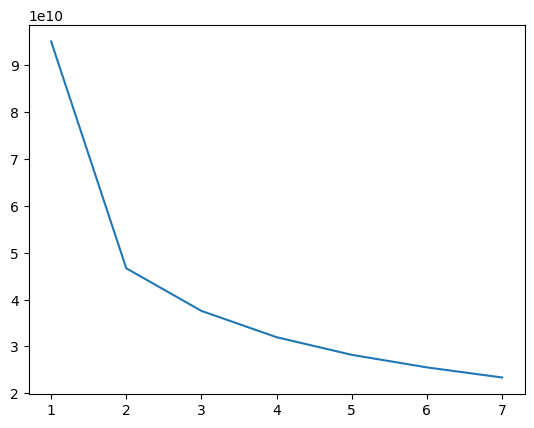

In [104]:
import matplotlib.pyplot as plt
plt.plot(range(1,8),wcss)  #Elbow Graph

#Q5) . Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [105]:
import sklearn.metrics as metrics


Silhouette score for k(clusters) = 3 is 0.36498654296505717
Silhouette score for k(clusters) = 4 is 0.3567854371823018
Silhouette score for k(clusters) = 5 is 0.2665458060373713
Silhouette score for k(clusters) = 6 is 0.256118789521472
Silhouette score for k(clusters) = 7 is 0.2731864548430524
Silhouette score for k(clusters) = 8 is 0.27104340690312445
Silhouette score for k(clusters) = 9 is 0.28347633432370456


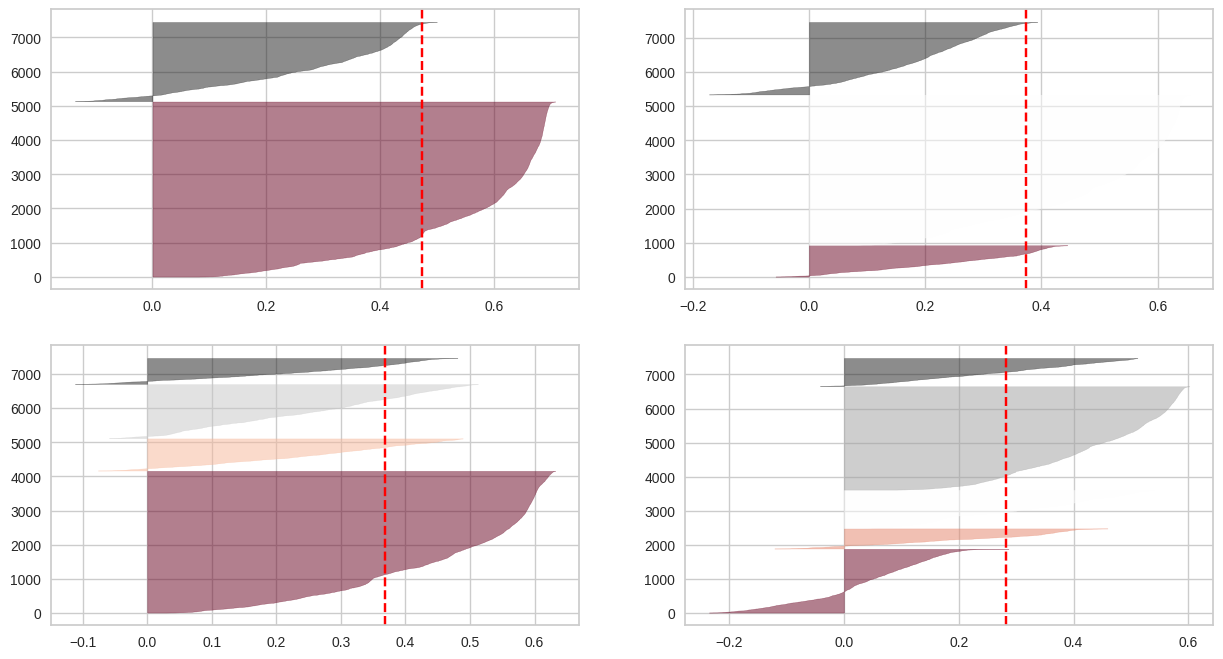

In [106]:
for i in range(3,10):
    kmeans=KMeans(n_clusters=i,
                  init="k-means++",
                  random_state=200)
    kmeans.fit(df)
    labels=kmeans.labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df,
                                         labels,
                                         metric="euclidean",
                                         sample_size=1000,
                                         random_state=200)))
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='RdGy', ax=ax[q-1][mod])
    visualizer.fit(x)


#Machine Learning Exam1 Time series Part




In [107]:
! unzip '/content/Machine Learning Question Paper 1 with datasets.zip'

Archive:  /content/Machine Learning Question Paper 1 with datasets.zip
   creating: Machine Learning Question Paper 1 with datasets/
   creating: Machine Learning Question Paper 1 with datasets/24 Machine Learning Question Paper 1 with datasets/
  inflating: Machine Learning Question Paper 1 with datasets/24 Machine Learning Question Paper 1 with datasets/bank.csv  
  inflating: Machine Learning Question Paper 1 with datasets/24 Machine Learning Question Paper 1 with datasets/Machine Learning using Python Question Paper 1.pdf  
  inflating: Machine Learning Question Paper 1 with datasets/24 Machine Learning Question Paper 1 with datasets/MonthWiseMarketArrivals_Clean.csv  


#Loading the necessary libraries

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

Reading the dataset

In [117]:
data = pd.read_csv('/content/Machine Learning Question Paper 1 with datasets/24 Machine Learning Question Paper 1 with datasets/MonthWiseMarketArrivals_Clean.csv')

getting the info about the dataset

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


Describing the dataset

In [125]:
data.describe()

year      quantity      priceMin      priceMax      priceMod
count  10227.000000  1.022700e+04  10227.000000  10227.000000  10227.000000
mean    2009.022294  7.660488e+04    646.944363   1212.760731    984.284345
std        4.372841  1.244087e+05    673.121850    979.658874    818.471498
min     1996.000000  2.000000e+01     16.000000    145.000000     80.000000
25%     2006.000000  8.898000e+03    209.000000    557.000000    448.000000
50%     2009.000000  2.746000e+04    440.000000    923.000000    747.000000
75%     2013.000000  8.835650e+04    828.000000   1527.000000   1248.000000
max     2016.000000  1.639032e+06   6000.000000   8192.000000   6400.000000

In [133]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Machine Learning Question Paper 1 with datasets/24 Machine Learning Question Paper 1 with datasets/MonthWiseMarketArrivals_Clean.csv')

# Print the columns to check for typos and ensure 'market' column exists
print(df.columns)

# Filter the data for Mumbai market
mumbai_df = df[df['market'] == 'MUMBAI']

# Convert the 'date' column to datetime and set it as the index
mumbai_df['date'] = pd.to_datetime(mumbai_df['date'], errors='coerce') # Handle potential errors in date format
mumbai_df.set_index('date', inplace=True)

# Remove rows with missing dates
mumbai_df = mumbai_df.dropna()

# Calculate the mean modal price for each month (start of month)
modal_price_monthly = mumbai_df.resample('MS')['priceMod'].mean()

# Keep only the 'priceMod' column
mumbai_df = mumbai_df[['priceMod']]

# Print the mean modal price for each month
print(modal_price_monthly)

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')
date
2004-01-01     849.0
2004-02-01     736.0
2004-03-01     498.0
2004-04-01     397.0
2004-05-01     405.0
               ...  
2015-10-01    3748.0
2015-11-01    2623.0
2015-12-01    1542.0
2016-01-01    1215.0
2016-02-01    1128.0
Freq: MS, Name: priceMod, Length: 146, dtype: float64


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


selecting the columns

In [138]:
cols_select = []
for i in df.columns:
    if i != 'date' and i != 'priceMod':
      cols_select.append(i)
    else:
       pass

In [139]:
print(cols_select)

['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax', 'state', 'city']


In [140]:
df.drop(cols_select , axis = 1 , inplace = True)

In [141]:
 df.head()


priceMod          date
0       446  January-2005
1       563  January-2006
2      1460  January-2010
3      3433  January-2011
4       605  January-2012

In [142]:
 df = df.sort_values('date')


In [144]:
df['date'] = pd.to_datetime(df['date'])

In [145]:
print(df['date'].min())
print(df['date'].max())

1996-01-01 00:00:00
2016-02-01 00:00:00


In [146]:
df = df.set_index('date')

In [147]:
df.head()

priceMod
date                
1996-04-01       254
1997-04-01       214
1998-04-01       235
1998-04-01       253
1998-04-01       237

# Q1. Get the modal price of onion for each month for the Mumbai market

In [148]:
df = df['priceMod'].resample('MS').mean()

In [149]:
df.describe()

count     242.000000
mean      768.696848
std       662.181587
min       148.200000
25%       342.131469
50%       538.274194
75%       992.643866
max      3989.190476
Name: priceMod, dtype: float64

# Q2. Build time series model and check the performance of the model using RMSE

In [164]:
import statsmodels.api as sm

In [166]:
model_sar = sm.tsa.statespace.SARIMAX(df,order=(2,1,2))

In [167]:
results = model_sar.fit()

In [168]:
forecast = results.predict(start = '1996-01-01' , end = '2016-02-01')

In [169]:
from sklearn.metrics import mean_squared_error

In [170]:
actual = df
predicted = forecast
rmse = np.sqrt(mean_squared_error(actual,predicted))
print(rmse)

226.18430308582404


# Q3. Plot ACF and PACF plots

In [150]:
from  pandas.plotting import  autocorrelation_plot

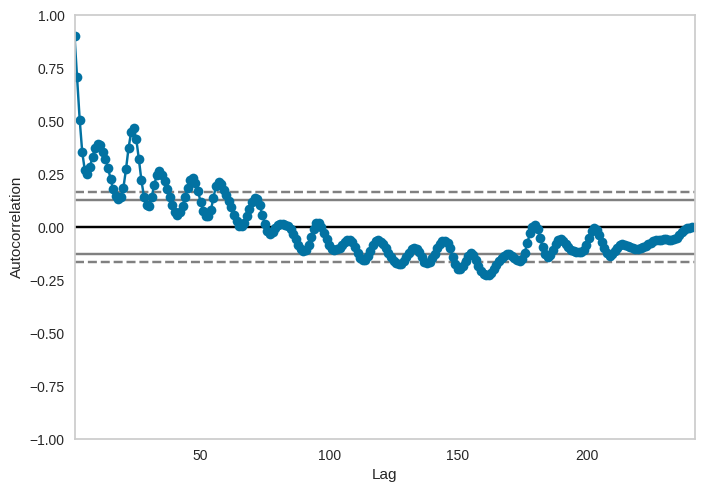

In [151]:
autocorrelation_plot(df, marker = 'o')
plt.show()

# Q4. Exponential smoothing using Holt-Winter’s technique and Forecast onion price for Mumbai market

In [152]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [154]:
model_exp = ExponentialSmoothing(df,trend='add',seasonal='add',seasonal_periods=12)

In [155]:
model_fit = model_exp.fit()

In [156]:
yhat = model_fit.fittedvalues
print(yhat)


date
1996-01-01     386.478278
1996-02-01     104.452898
1996-03-01      84.032485
1996-04-01     212.802305
1996-05-01     266.343039
                 ...     
2015-10-01    3984.640287
2015-11-01    2798.995082
2015-12-01    1985.923219
2016-01-01    1371.330354
2016-02-01    1054.113969
Freq: MS, Length: 242, dtype: float64


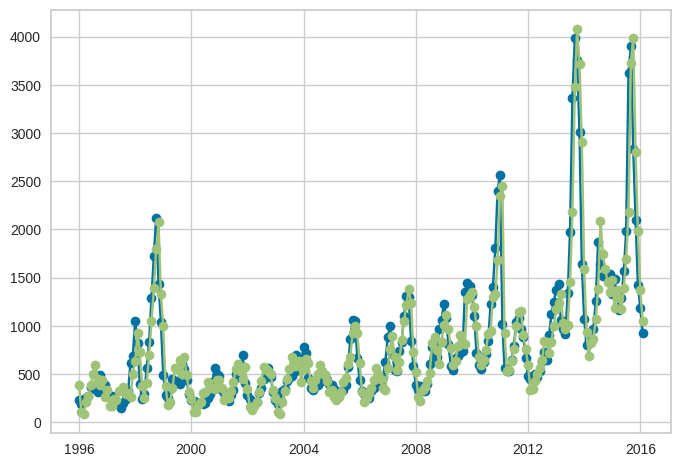

In [158]:
plt.plot(df , marker = 'o')
plt.plot(yhat , marker = 'o')
plt.show()

2. Fit the model and predict for future values

In [159]:
model_exp1 = ExponentialSmoothing(df, trend= 'add' , seasonal = 'add' , seasonal_periods = 12)

In [160]:
model_fit = model_exp1.fit()

In [161]:
forecast_values = 10
yhat = model_fit.forecast(steps = forecast_values)

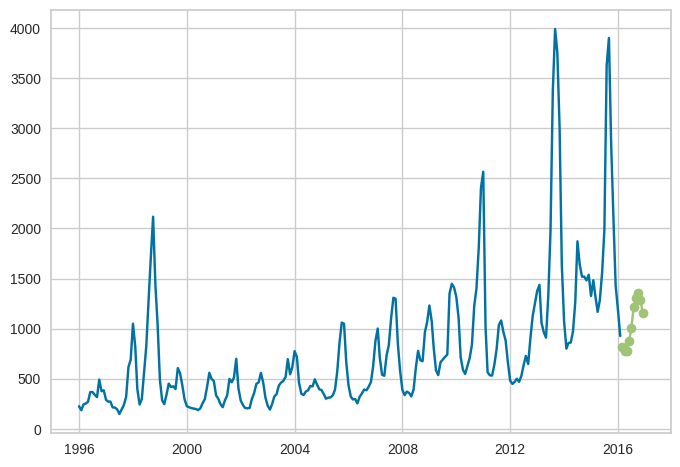

In [162]:
plt.plot(df)
plt.plot(yhat , marker = 'o')
plt.show()